In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import datetime as dt

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
import pylab as py

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.simplefilter(action="ignore", category=FutureWarning)

## 0. Read data, info

In [2]:
data_file_path = "C:/Users/Bas/OneDrive/MSc. Artificial Intelligence VU/MSc. AI Year 1/Data Mining Techniques/Assignment 2/data/"
train = pd.read_csv(data_file_path + "training_set_VU_DM.csv", sep=',')
print(len(train)) #4,958,347 rows
print(np.sort(train['srch_id'].unique())[:10])
train.head(5)

4958347
[ 1  4  6  8 11 12 17 21 25 28]


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [2]:
data_file_path = "C:/Users/Bas/OneDrive/MSc. Artificial Intelligence VU/MSc. AI Year 1/Data Mining Techniques/Assignment 2/data/"
test = pd.read_csv(data_file_path + "test_set_VU_DM.csv", sep=',')
print(len(test)) #4,959,183 rows
print(np.sort(test['srch_id'].unique())[:10])
test.head(5)

# missing columns in test:             position, click_bool, gross_bookings_usd, nor booking_bool

4959183
[ 1  3  6  7 10 11 12 13 14 16]


,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.5,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# #export 5 training examples to excel to easily view
# for i in np.sort(train['srch_id'].unique())[:5]:
#     train[train['srch_id'] == i].to_excel('srch_id_' + str(i) + '.xlsx', sheet_name='new_sheet')

In [5]:
len(train.columns.to_list())

54

In [8]:
print(len(train['srch_id'].unique()))

199795


In [47]:
print(train.groupby('srch_id').size().min())
print(train.groupby('srch_id').size().max())
print(sum(train.groupby('srch_id').size() >= 35))

5
38
2048


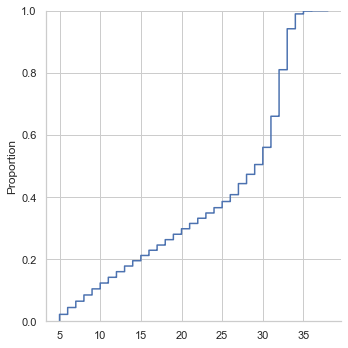

In [51]:
sns.displot(train.groupby('srch_id').size(), kind="ecdf")

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [23]:
train.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


In [7]:
train.columns[train.isna().sum()/len(train) * 100 > 90].to_list() #perc of missing obs

['visitor_hist_starrating',
 'visitor_hist_adr_usd',
 'srch_query_affinity_score',
 'comp1_rate',
 'comp1_inv',
 'comp1_rate_percent_diff',
 'comp3_rate_percent_diff',
 'comp4_rate',
 'comp4_inv',
 'comp4_rate_percent_diff',
 'comp6_rate',
 'comp6_inv',
 'comp6_rate_percent_diff',
 'comp7_rate',
 'comp7_inv',
 'comp7_rate_percent_diff',
 'gross_bookings_usd']

In [25]:
print(min(train['srch_id'].value_counts().sort_index())) #min number of rows in one search query = 5
print(max(train['srch_id'].value_counts().sort_index())) #max number of rows in one search query = 38

5
38


In [14]:
# d = {}
# for search in list(train_subset['srch_id'].unique()):
#     d["srch_id_{0}".format(search)] = train_subset[train_subset['srch_id']==search]

# Distribution scheck

In [4]:
train.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

## 1. EDA, Chapter 2 of report

In [29]:
train['nr_results'] = np.ones(len(train))

## booking_bool

In [39]:
# train['booking_bool'].value_counts()
print(train['booking_bool'].value_counts())

0    4819957
1     138390
Name: booking_bool, dtype: int64


In [30]:
train.groupby('srch_id').sum()['booking_bool'].max() #max nr of bookings per search_id = 1

1

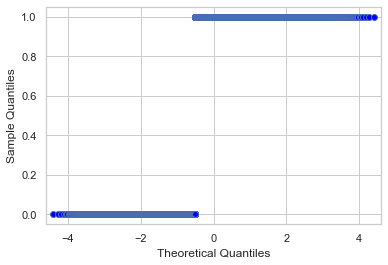

In [41]:
sm.qqplot(train.groupby('srch_id').sum()['booking_bool'])
py.show()

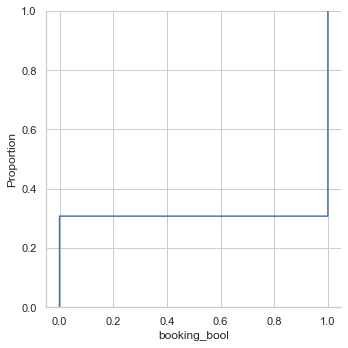

In [46]:
sns.displot(train.groupby('srch_id').sum()['booking_bool'], kind="ecdf")

In [57]:
interesting_cols = ['prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','price_usd','promotion_flag','click_bool','gross_bookings_usd']
train.groupby('booking_bool').mean()[interesting_cols]

,visitor_hist_starrating,visitor_hist_adr_usd,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,price_usd,promotion_flag,click_bool,gross_bookings_usd
booking_bool,,,,,,,,,,
0,3.374608,176.010166,3.176749,3.773183,0.633884,2.873438,254.028576,0.213108,0.017322,NaN
1,3.367019,176.356201,3.312060,3.937649,0.663090,2.843014,260.514070,0.303107,1.000000,386.283316


## click_bool

In [59]:
print(train['click_bool'].value_counts())

0    4736468
1     221879
Name: click_bool, dtype: int64


In [34]:
train.groupby('srch_id').sum()['click_bool'].max() #max nr of clicks per search_id = 25

25

In [35]:
sum(train.groupby('srch_id').sum()['click_bool'] > 1) #max nr of clicks per search_id = 25

13031

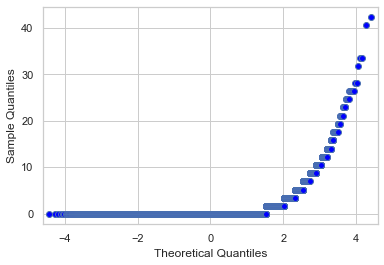

In [45]:
sm.qqplot(train.groupby('srch_id').sum()['click_bool'], fit = True)
py.show()

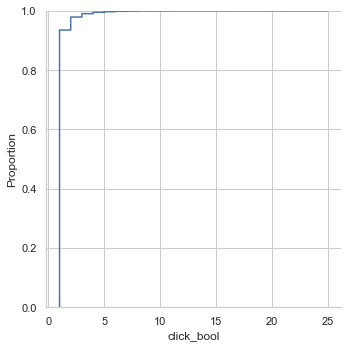

In [44]:
sns.displot(train.groupby('srch_id').sum()['click_bool'], kind="ecdf")

In [61]:
interesting_cols = ['prop_starrating','prop_review_score','prop_brand_bool','prop_location_score1','price_usd','promotion_flag','booking_bool','gross_bookings_usd']
train.groupby('click_bool').mean()[interesting_cols]

,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,price_usd,promotion_flag,booking_bool,gross_bookings_usd
click_bool,,,,,,,,
0,3.173522,3.772451,0.634609,2.871865,252.443627,0.212109,0.000000,NaN
1,3.330031,3.891428,0.636626,2.888035,291.907731,0.290559,0.623718,386.283316


## other

In [3]:
sum(train.groupby('srch_id').mean()['price_usd']>1000)

281

In [21]:
train.groupby('srch_id').mean()['price_usd'].max()

996.0

<AxesSubplot:xlabel='price_usd', ylabel='Probability'>

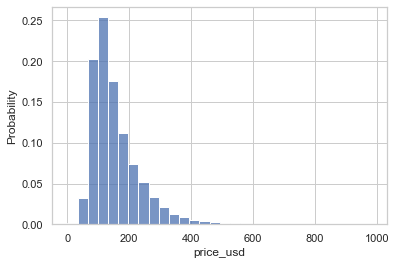

In [3]:
train = train[train['price_usd'] < 1000]
sns.histplot(train.groupby('srch_id').mean()['price_usd'],bins=30, stat="probability") #histogram of price

In [4]:
# sns.histplot(train.groupby('srch_id').mean()['gross_bookings_usd'],bins=30) #histogram of price

<AxesSubplot:xlabel='price_usd', ylabel='Probability'>

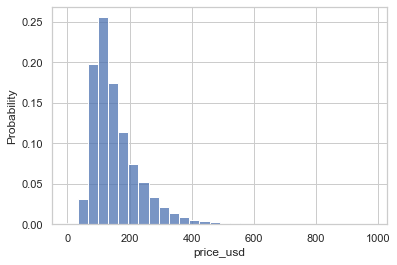

In [6]:
sns.histplot(test.groupby('srch_id').mean()['price_usd'],bins=30,stat="probability") #histogram of price

<AxesSubplot:xlabel='booking_bool', ylabel='promotion_flag'>

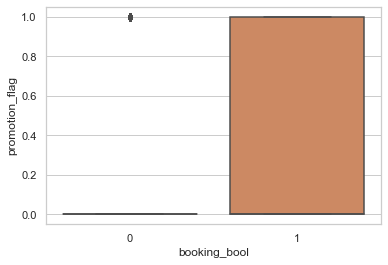

In [8]:
sns.boxplot(x="booking_bool", y="promotion_flag", data=train)

<AxesSubplot:xlabel='nr_results', ylabel='click_bool'>

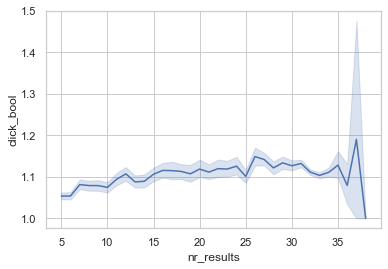

In [74]:
sns.lineplot(train.groupby('srch_id').sum()['nr_results'],train.groupby('srch_id').sum()['click_bool'])

<AxesSubplot:xlabel='nr_results', ylabel='booking_bool'>

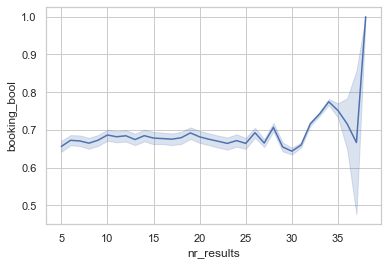

In [75]:
sns.lineplot(train.groupby('srch_id').sum()['nr_results'],train.groupby('srch_id').sum()['booking_bool'])

In [14]:
# sns.lineplot(train.groupby('srch_id').mean()['price_usd'],train.groupby('srch_id').sum()['booking_bool'])

In [19]:
train.groupby('booking_bool').mean()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,nr_results
booking_bool,,,,,,,,,,,,,,,,,,,,,
0,166358.630197,9.954887,175.312266,3.374608,176.010166,173.959682,70082.676326,3.176749,3.773183,0.633884,...,17.221880,0.144764,0.083554,19.377150,-0.062814,0.009978,22.639826,0.017322,NaN,1.0
1,166642.784746,9.892051,176.322191,3.367019,176.356201,174.468972,69957.389132,3.312060,3.937649,0.663090,...,18.127057,0.182231,0.072401,21.086651,0.003184,0.009468,15.908506,1.000000,386.283316,1.0


In [21]:
# sns.boxplot(train[['booking_bool','prop_starrating']])

<AxesSubplot:xlabel='booking_bool', ylabel='prop_starrating'>

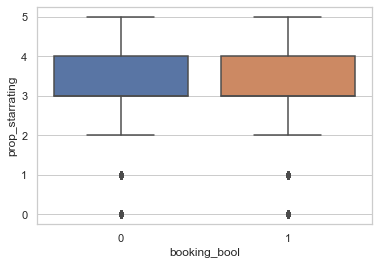

In [22]:
sns.boxplot(x="booking_bool", y="prop_starrating", data=train)

In [23]:
train_boxplot = []
sns.boxplot(x="booking_bool", y="value", data=pd.melt(train_boxplot))

AttributeError: 'list' object has no attribute 'columns'

## Competitive info

In [24]:
for comp in [1,2,3,4,5,6,7,8]:
    train['comp{0}_inv'.format(comp)].replace({0:1, 1:0, -1:1}, inplace=True)
    train['comp{0}'.format(comp)] = train['comp{0}_inv'.format(comp)] * train['comp{0}_rate'.format(comp)] * train['comp{0}_rate_percent_diff'.format(comp)]

In [25]:
train['comp_total'] = train[['comp1','comp2','comp3','comp4','comp5','comp6','comp7','comp8',]].max(axis=1)

In [26]:
train.groupby('booking_bool').mean()['comp_total']

booking_bool
0    24.446233
1    22.785314
Name: comp_total, dtype: float64

<AxesSubplot:xlabel='booking_bool', ylabel='comp_total'>

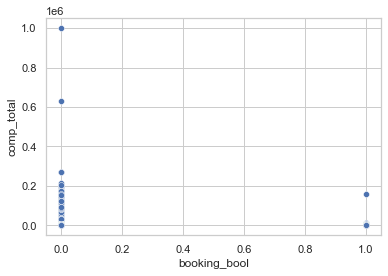

In [27]:
sns.scatterplot(x="booking_bool", y="comp_total", data=train)

In [5]:
test = pd.read_csv("test_subset.csv")

In [6]:
#export 5 training examples to excel to easily view
for i in np.sort(test['srch_id'].unique())[:1]:
    test[test['srch_id'] == i].to_excel('srch_id_' + str(i) + '.xlsx', sheet_name='new_sheet')